<a href="https://colab.research.google.com/github/shivjain123/Decision_Tree-project/blob/master/Decision_Tree_(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as p

col_names = ["psid", "class", "gender", "age", "sib", "par", "label"]

df = p.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/C119/titanic.csv", names = col_names).iloc[1:]
1
print(df.head())

In [2]:
features = ["gender", "age", "sib", "par"]
X = df[features]
Y = df.label

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics as m

x_train, x_test, y_train, y_test = tts(X, Y, test_size = 0.3, random_state = 1)

dtcl = DecisionTreeClassifier(max_depth = 3)

dtcl.fit(x_train, y_train)

y_predict = dtcl.predict(x_test)
m.accuracy_score(y_test, y_predict)

0.746268656716418

In [ ]:
from sklearn.tree import export_graphviz as eg
from six import StringIO
from IPython.display import Image
import pydotplus as pdp

dot_data = StringIO()

eg(dtcl, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])

print(dot_data.getvalue())

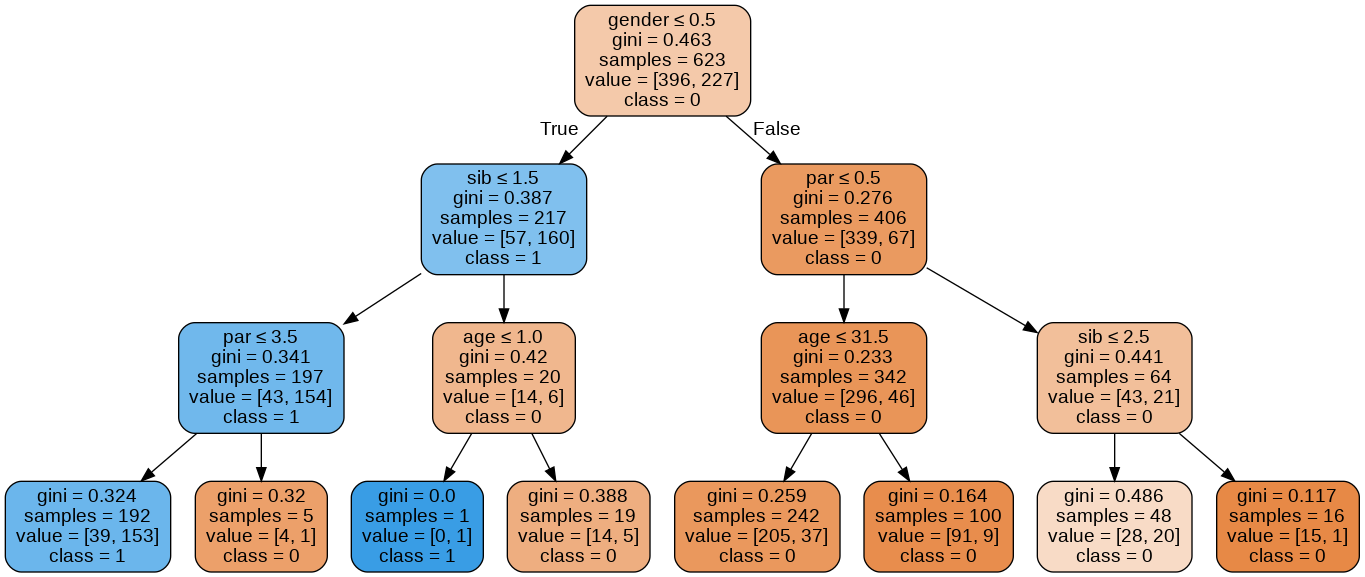

In [10]:
graph = pdp.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())